In [58]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [174]:
galton = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week3/galton.csv')
hybrid = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week10/hybrid.csv')
sat = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week10/sat2014.csv')
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()   
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [230]:
votes = [1,1,1,1,1,0,0,0,0,0,0]

np.std(votes)

0.49792959773196915

In [234]:
def std_of(total_count, ones_count):
    votes = np.append(np.ones(ones_count),np.zeros(total_count - ones_count))
    return np.std(votes)

In [235]:
std_of(10,5)

0.5

In [236]:
stds_array = make_array()
for i in np.arange(1,11,1):
    stds_array = np.append(stds_array, std_of(10,i))
Table().with_column("Num of votes", np.arange(1,11,1)) \
    .with_column("STD", stds_array)

Num of votes,STD
1,0.3
2,0.4
3,0.458258
4,0.489898
5,0.5
6,0.489898
7,0.458258
8,0.4
9,0.3
10,0


In [238]:
heights.show(3)

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69


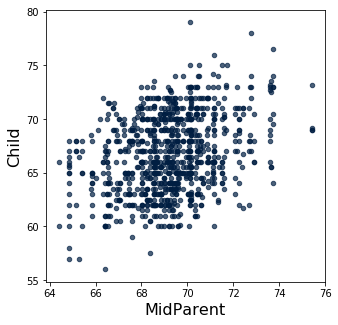

In [240]:
heights.scatter(0)

In [241]:
heights_with_prediction = heights.with_column("Prediction", heights.apply(predict_child, "MidParent"))


In [242]:
heights_with_prediction

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


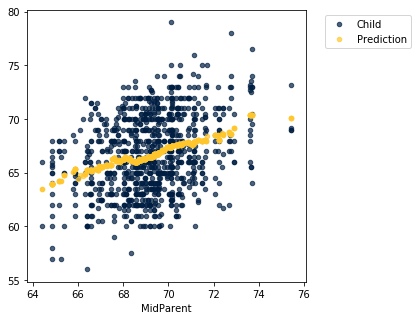

In [243]:
heights_with_prediction.scatter(0)

In [244]:
hybrid.show(3)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact


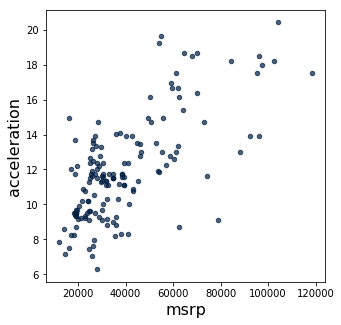

In [245]:
hybrid.scatter(2,3)

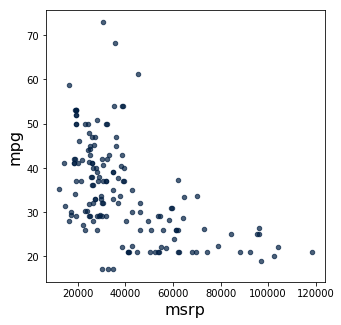

In [246]:
hybrid.scatter(2,4)

In [ ]:
hybrid

In [250]:
suv = hybrid.where("class","SUV")

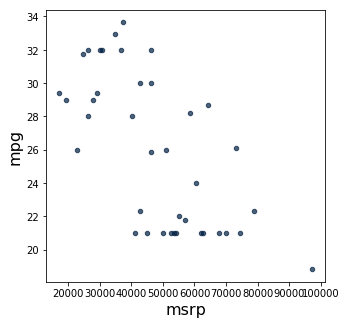

In [251]:
suv.scatter(2,4)

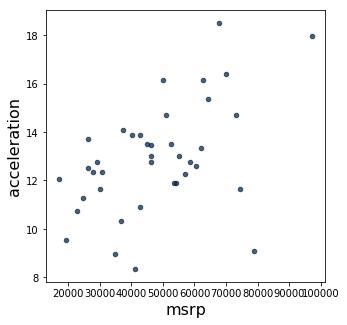

In [252]:
suv.scatter(2,3)

In [253]:
def to_su(values):
    mean = np.mean(values)
    std = np.std(values)
    return (values - mean)/std

In [254]:
to_su(suv.column(2))

array([-0.6088397 ,  0.6059908 , -1.02536202, -1.57389216, -0.71470688,
       -0.26136656, -0.07756407, -1.26795953,  0.52667077, -1.37281458,
        1.74110977, -0.07734829,  0.7171405 ,  2.75907914, -1.17982456,
       -0.15128849, -0.36653359,  0.92174105, -0.56241763, -1.70054683,
        1.42138165, -1.09309043, -0.9692647 , -0.26758445,  0.41931432,
       -0.94332816, -1.19070101,  1.12768795,  0.14042712,  0.27819738,
       -0.07308625, -0.41453947,  0.1821695 ,  1.23600314,  0.83143112,
        1.49042471,  0.33343216,  0.36262808,  0.79723019])

In [255]:
def columns_to_su(table, columns):
    for column in columns:
        table = table.with_column(column + " (SU)", to_su(table.column(column)))
    return table

In [257]:
suv_su = columns_to_su(suv, ["msrp", "mpg", "acceleration"])

In [258]:
suv_su

vehicle,year,msrp,acceleration,mpg,class,msrp (SU),mpg (SU),acceleration (SU)
Escape,2004,36676.1,10.32,31.99,SUV,-0.60884,1.31784,-1.16157
Lexus RX400h,2005,58521.1,12.76,28.23,SUV,0.605991,0.48955,-0.0718039
Highlander,2005,29186.2,12.76,29.4,SUV,-1.02536,0.747288,-0.0718039
Escape 2WD,2005,19322.6,9.52,29,SUV,-1.57389,0.659172,-1.51888
Mercury Mariner,2006,34772.4,8.98,32.93,SUV,-0.714707,1.52491,-1.76005
Chevrolet Tahoe,2007,42924.3,10.91,22.35,SUV,-0.261367,-0.805749,-0.898064
Kluger,2007,46229.5,12.76,25.87,SUV,-0.0775641,-0.0303321,-0.0718039
Tribute,2007,24823.8,11.28,31.75,SUV,-1.26796,1.26497,-0.732812
GMC Yukon,2007,57094.8,12.28,21.78,SUV,0.526671,-0.931314,-0.286185
Vue,2007,22938.3,10.75,26,SUV,-1.37281,-0.00169453,-0.969524


(-5, 5)

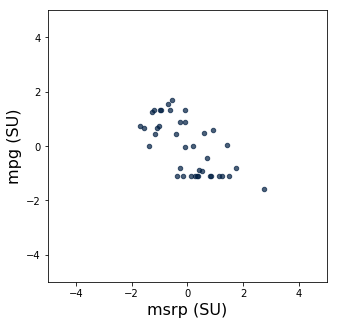

In [263]:
suv_su.scatter(6,7)
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

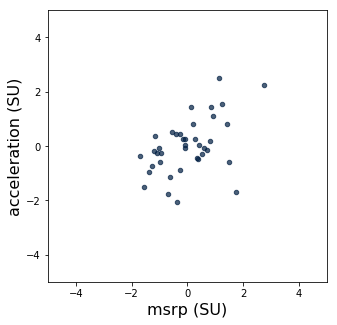

In [262]:
suv_su.scatter(6,8)
plt.xlim(-5,5)
plt.ylim(-5,5)

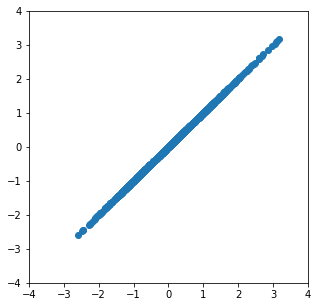

In [264]:
r_scatter(1)

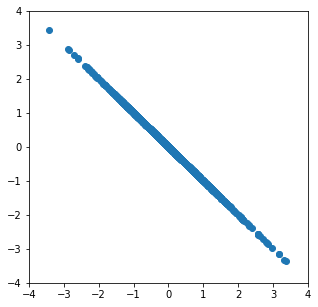

In [265]:
r_scatter(-1)

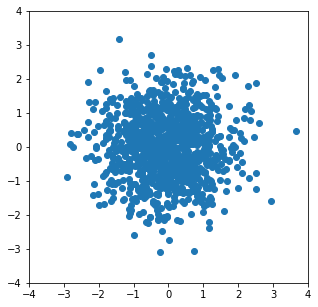

In [266]:
r_scatter(0)

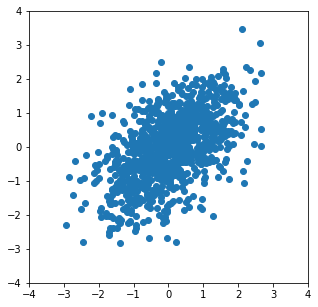

In [267]:
r_scatter(0.5)

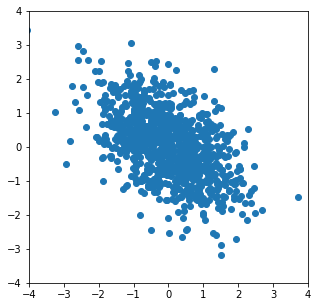

In [268]:
r_scatter(-0.5)

In [272]:
def compute_r(table, colx, coly):
    table_su = columns_to_su(table.select(colx,coly), [colx, coly])
    colx_su = table_su.column(2)
    coly_su = table_su.column(3)
    return np.mean(colx_su * coly_su)

In [273]:
compute_r(suv, "msrp", "mpg")

-0.6667143635709919

In [274]:
compute_r(suv, "msrp", "acceleration")

0.48699799279959155